In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
data = pd.read_csv('water.csv') #Загружаем файл
data

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


'Строим точечный график для визуализации, можно предположить,\nчто есть обратная зависимость между жесткостью воды и смертностью'

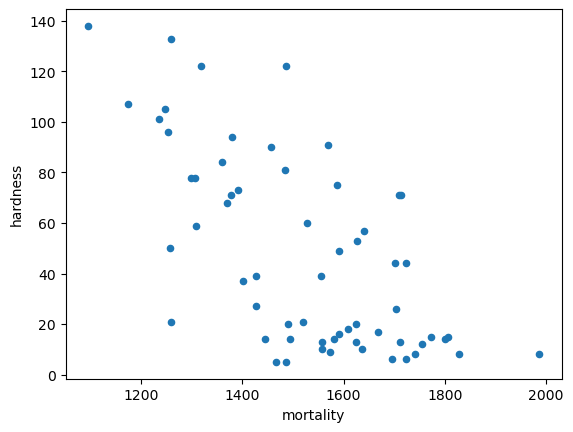

In [206]:
data.plot(kind='scatter', x='mortality', y='hardness')
"""Строим точечный график для визуализации, можно предположить,
что есть обратная зависимость между жесткостью воды и смертностью"""

In [207]:
data[['mortality', 'hardness']].corr() #коэффициент Пирсона - средняя обратная корреляция

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [208]:
data[['mortality', 'hardness']].corr(method = 'spearman') #коэффициент Спирмена  - средняя обратная корреляция

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [209]:
from sklearn.linear_model import LinearRegression #строим модель регрессии
from sklearn.model_selection import train_test_split
import numpy as np

In [210]:
x = data['mortality']
y = data['hardness']
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [211]:
x_test2 = x_test.values.reshape(-1, 1)

In [212]:
model = LinearRegression() #обучаем модель
model.fit(x_train.values.reshape(-1, 1), y_train)


LinearRegression()

In [213]:
model.coef_

array([-0.13245653])

In [214]:
model.intercept_

249.98084549947168

In [215]:
y_pred = model.predict(x_test2)
y_pred

array([21.62578598, 43.74602667, 84.80755129, 48.77937485, 21.75824251,
       39.24250461, 55.79957099, 23.08280782, 53.15044037, 19.24156842,
       67.32328919, 40.56706992, 53.2828969 , 68.6478545 , 34.73898256,
       42.15654829])

In [216]:
model.score(x_test2, y_test) #коэффициент детерминации меньше 0.5, поэтому  регрессионную модель нельзя считать надежной

0.24415199035396706

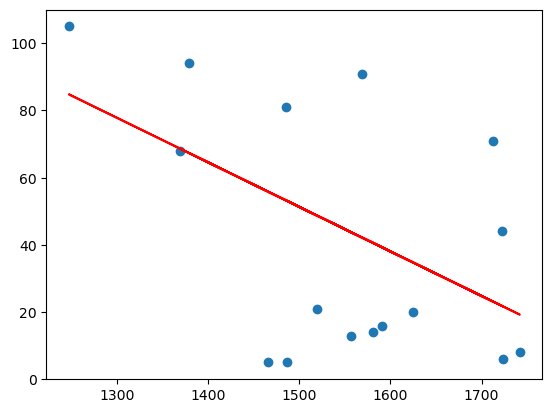

In [217]:
plt.scatter(x_test2, y_test)
plt.plot(x_test2, y_pred, c='r')

In [218]:
import statsmodels.api as sm #альтернативный метод
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [219]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [220]:
x_const = sm.add_constant(x_train)

In [221]:
x_const

,const,mortality
4,1.0,1609
44,1.0,1591
19,1.0,1260
47,1.0,1369
52,1.0,1640
25,1.0,1096
57,1.0,1627
15,1.0,1491
58,1.0,1486
27,1.0,1402


In [222]:
model = sm.OLS(y_train, x_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           7.83e-06
Time:                        21:39:42   Log-Likelihood:                -201.74
No. Observations:                  42   AIC:                             407.5
Df Residuals:                      40   BIC:                             411.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.3678     37.934      6.310      0.0

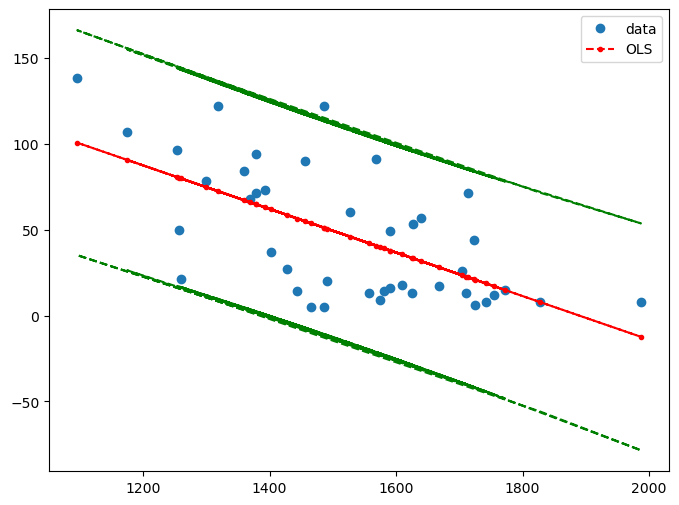

In [163]:
prstd, iv_l, iv_u = wls_prediction_std(results) #посторим график с доверительным интервалом
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(x_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(x_const.iloc[:, 1], iv_u, 'g--')
ax.plot(x_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

Text(0, 0.5, 'Остатки')

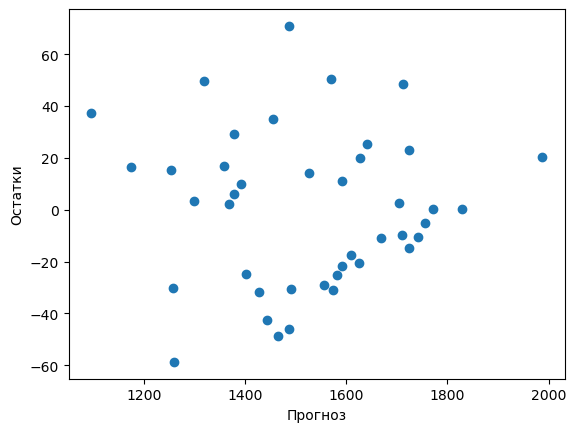

In [227]:
plt.scatter(x=x_const.iloc[:, 1], y=results.resid)
"""точечный график остатков - остатки более менее равномерно распределены относительно горизонтальной оси,
что позволяет предположить, что модель адекватна"""
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

(array([1., 2., 1., 0., 5., 4., 2., 3., 1., 5., 3., 4., 4., 1., 2., 0., 3.,
        0., 0., 1.]),
 array([-58.7233036 , -52.24157083, -45.75983806, -39.27810529,
        -32.79637252, -26.31463975, -19.83290698, -13.35117421,
         -6.86944144,  -0.38770867,   6.0940241 ,  12.57575687,
         19.05748964,  25.53922241,  32.02095518,  38.50268795,
         44.98442072,  51.46615349,  57.94788627,  64.42961904,
         70.91135181]),
 <BarContainer object of 20 artists>)

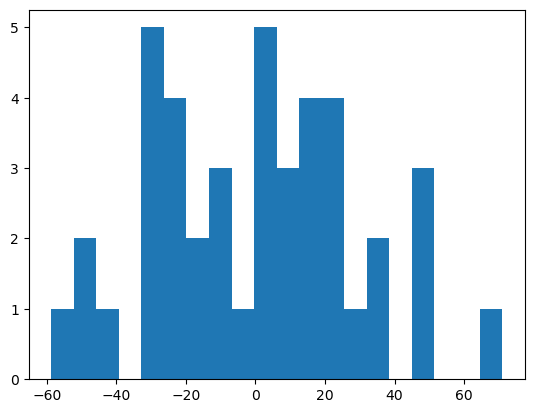

In [165]:
plt.hist(results.resid, bins=20) #такая же картина

In [228]:
data_s = data.loc[data['location'] == 'South'] #Проследим зависимость для южных городов
data_s

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73
12,13,South,Cardiff,1519,21
13,14,South,Coventry,1307,78
14,15,South,Croydon,1254,96
18,19,South,East Ham,1318,122
19,20,South,Exeter,1260,21


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

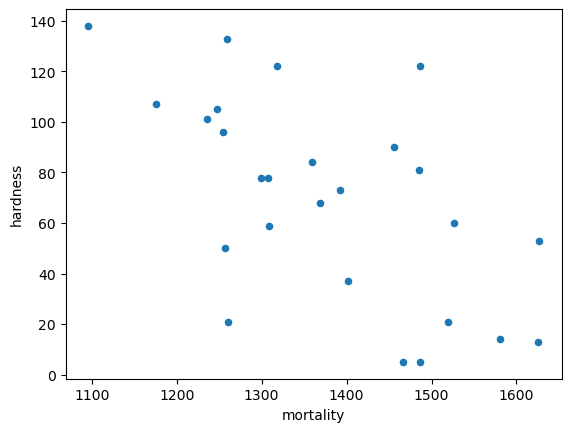

In [229]:
data_s.plot(kind='scatter', x='mortality', y='hardness')

In [230]:
data_s[['mortality', 'hardness']].corr() #тоже обратная корреляция, но слабее чем в целом по стране

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [231]:
data_s[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [232]:
x = data_s['mortality']
y = data_s['hardness']
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [233]:
model = LinearRegression()
model.fit(x_train.values.reshape(-1, 1), y_train)



LinearRegression()

In [234]:
y_pred = model.predict(x_test.values.reshape(-1, 1))
y_pred

array([34.19850067, 83.0033788 , 69.95804974, 68.42330515, 60.13568433,
       58.60093974, 92.21184637])

In [236]:
model.score(x_test.values.reshape(-1, 1), y_test) #коэффициент детерминации выше, чем по стране в целом

0.40855413677368846

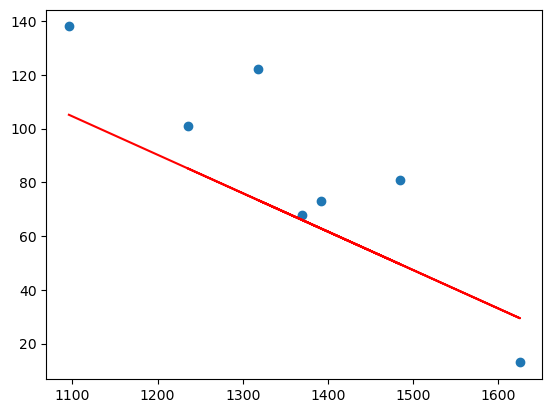

In [174]:
plt.scatter(x_test.values.reshape(-1, 1), y_test)
plt.plot(x_test.values.reshape(-1, 1), y_pred, c='r')

In [175]:
x_const = sm.add_constant(x_train)

In [176]:
model = sm.OLS(y_train, x_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     5.002
Date:                Sat, 15 Apr 2023   Prob (F-statistic):             0.0390
Time:                        21:22:50   Log-Likelihood:                -93.950
No. Observations:                  19   AIC:                             191.9
Df Residuals:                      17   BIC:                             193.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        261.9399     88.840      2.948      0.0

/Users/alexa_yakovleva/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


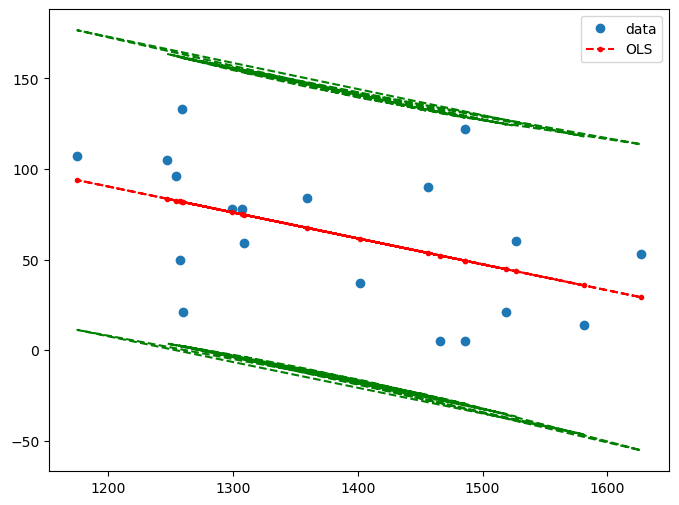

In [177]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(x_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(x_const.iloc[:, 1], iv_u, 'g--')
ax.plot(x_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

Text(0, 0.5, 'Остатки')

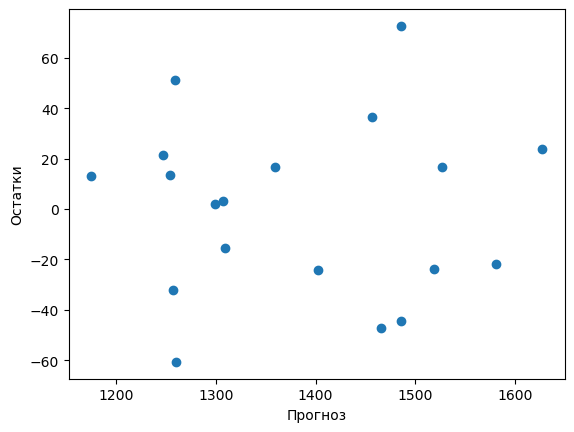

In [178]:
plt.scatter(x=x_const.iloc[:, 1], y=results.resid) #модель можно считать адекватной, остаки распределены равномерно
plt.xlabel('Прогноз')
plt.ylabel('Остатки')


(array([1., 0., 2., 0., 1., 3., 1., 0., 0., 2., 0., 4., 2., 0., 1., 0., 1.,
        0., 0., 1.]),
 array([-60.69324495, -54.02674679, -47.36024864, -40.69375048,
        -34.02725233, -27.36075417, -20.69425602, -14.02775786,
         -7.36125971,  -0.69476155,   5.9717366 ,  12.63823476,
         19.30473291,  25.97123107,  32.63772922,  39.30422738,
         45.97072553,  52.63722369,  59.30372185,  65.97022   ,
         72.63671816]),
 <BarContainer object of 20 artists>)

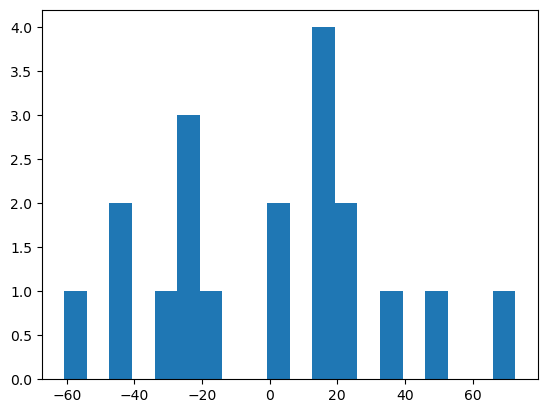

In [179]:
plt.hist(results.resid, bins=20)

In [237]:
data_n = data.loc[data['location'] == 'North'] #Рассчитаем те же показатели для северных городов
data_n

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

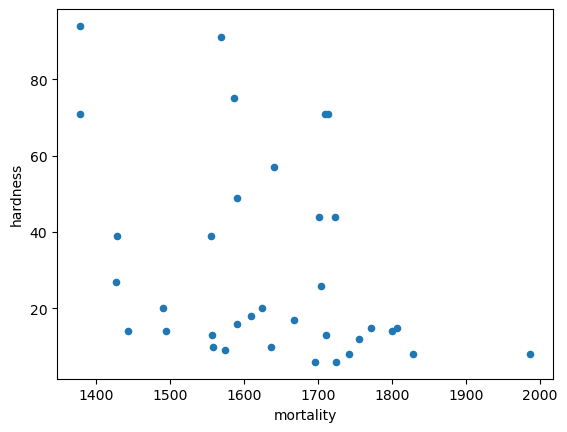

In [238]:
data_n.plot(kind='scatter', x='mortality', y='hardness')

In [239]:
data_n [['mortality', 'hardness']].corr() #слабая обратная корреляция

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [240]:
data_n[['mortality', 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [241]:
x = data_s['mortality']
y = data_s['hardness']
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [242]:
model = LinearRegression()
model.fit(x_train.values.reshape(-1, 1), y_train)



LinearRegression()

In [243]:
y_pred = model.predict(x_test.values.reshape(-1, 1))
y_pred

array([25.73065071, 50.66462985, 44.82901771, 91.16024135, 67.28728261,
       90.80656789, 50.84146658])

In [245]:
model.score(x_test.values.reshape(-1, 1), y_test) #низкий коэффициент детерминации

0.2650929883580634

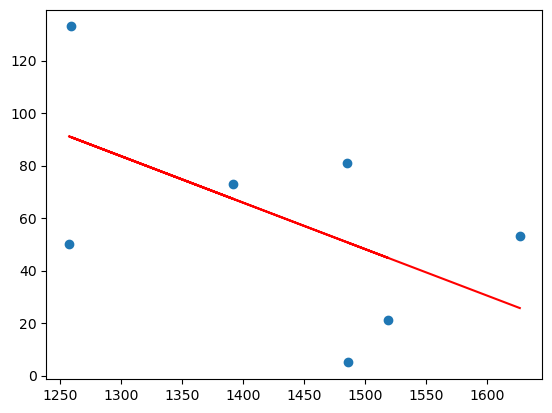

In [246]:
plt.scatter(x_test.values.reshape(-1, 1), y_test)
plt.plot(x_test.values.reshape(-1, 1), y_pred, c='r')

In [247]:
x_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     10.22
Date:                Sat, 15 Apr 2023   Prob (F-statistic):            0.00528
Time:                        21:57:41   Log-Likelihood:                -92.150
No. Observations:                  19   AIC:                             188.3
Df Residuals:                      17   BIC:                             190.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        313.4440     75.393      4.157      0.0

/Users/alexa_yakovleva/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


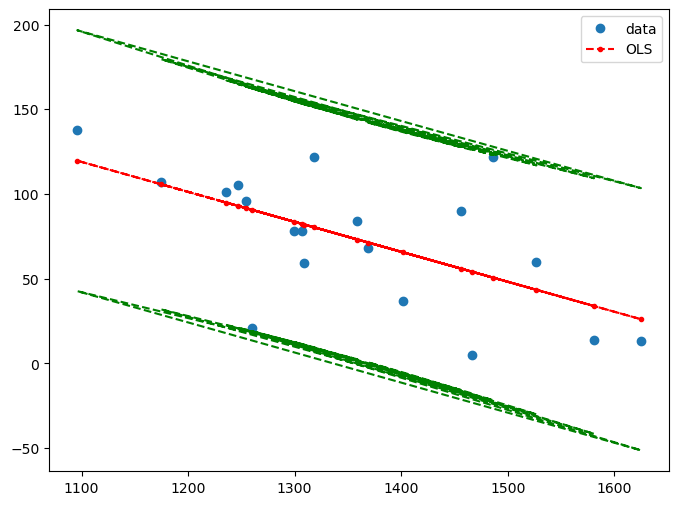

In [248]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(x_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(x_const.iloc[:, 1], iv_u, 'g--')
ax.plot(x_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

Text(0, 0.5, 'Остатки')

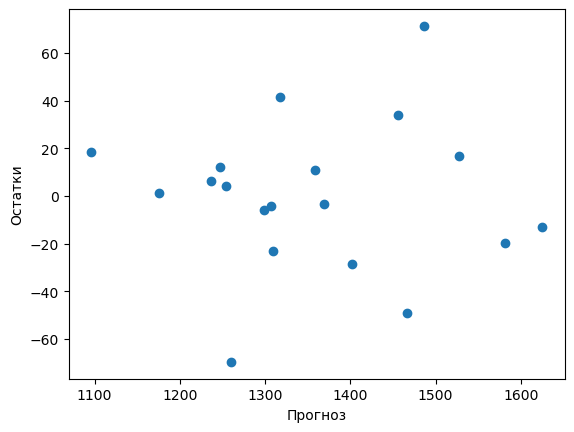

In [249]:
plt.scatter(x=x_const.iloc[:, 1], y=results.resid) #остатки распределены более менее равномерно
plt.xlabel('Прогноз')
plt.ylabel('Остатки')



(array([1., 0., 1., 0., 0., 1., 1., 1., 1., 3., 3., 2., 2., 0., 1., 1., 0.,
        0., 0., 1.]),
 array([-69.62973116, -62.58147609, -55.53322103, -48.48496596,
        -41.4367109 , -34.38845583, -27.34020077, -20.2919457 ,
        -13.24369064,  -6.19543557,   0.8528195 ,   7.90107456,
         14.94932963,  21.99758469,  29.04583976,  36.09409482,
         43.14234989,  50.19060495,  57.23886002,  64.28711509,
         71.33537015]),
 <BarContainer object of 20 artists>)

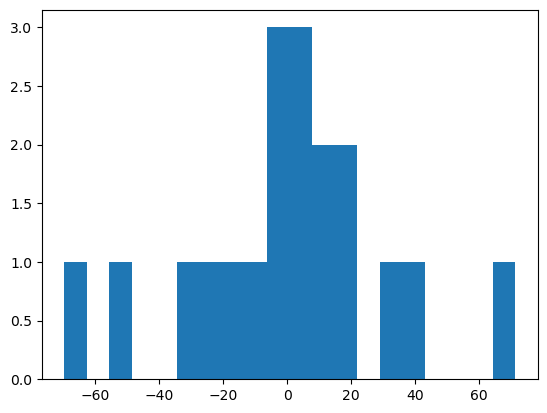

In [250]:
plt.hist(results.resid, bins=20)

In [ ]:
"""Можно сделать вывод, что есть обратная зависимость между жесткостью воды и смертностью, в южных городах она выражена сильнее чем в северных"""